***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [3]:
dataset = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [4]:
dataset

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [5]:
# sm é o salário minimo de 2015
sm = 788
classes = [dataset['Renda'].min(),2*sm,5*sm,15*sm,25*sm,dataset['Renda'].max()]
classes

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [6]:
labels = ['E','D','C','B','A']
labels

['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [7]:
# freq é a coluna de frequências
freq = pd.value_counts(pd.cut(dataset['Renda'],bins=classes,labels=labels,include_lowest = True)).sort_index(ascending = False)
freq

A      420
B      822
C     7241
D    18602
E    49755
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [8]:
#percent é a coluna de percentuais
percent = pd.value_counts(pd.cut(dataset['Renda'],bins=classes,labels=labels,include_lowest = True),normalize= True)*100
percent.sort_index(ascending = False,inplace=True)
percent

A     0.546590
B     1.069755
C     9.423477
D    24.208745
E    64.751432
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [9]:
freq_percent = pd.DataFrame({'Frequência':freq,'Porcentagem (%)':percent})
freq_percent

,Frequência,Porcentagem (%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

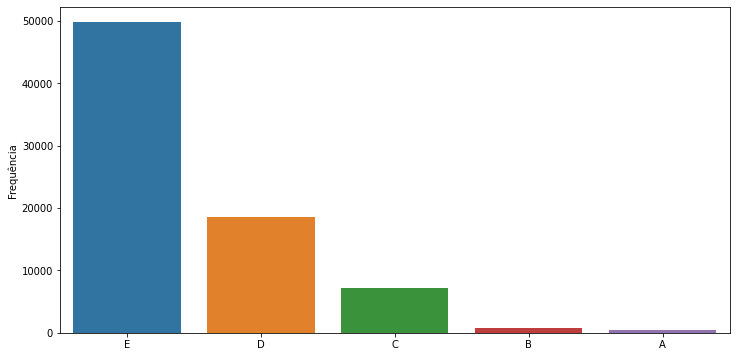

In [10]:
ax = sns.barplot(data = freq_percent,x = freq_percent.index,y='Frequência')
ax.figure.set_size_inches(12,6)

In [11]:
print(freq_percent.loc[['C','B','A']]['Porcentagem (%)'].sum())
print(freq_percent.loc[['B','A']]['Porcentagem (%)'].sum())

11.039823008849558
1.61634565330557


> ### Conclusões

64.75% da população ganha até 2 salários mínimo (R$ 1576) em 2015.

Se você era chefe de família em 2015 e ganhou mais de R$ 3940 mensais, você fazia parte dos 11% chefes de família mais bem pagos do Brasil.

Portanto, nota-se uma grande concentracação de pessoas nas classes mais baixas de renda. E, a cada classe que passa, o número de pessoas cai drasticamente comparada a classe anterior. Restando apenas 1.6% de pessoas nas classes mais altas (B e A)


### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'R$')

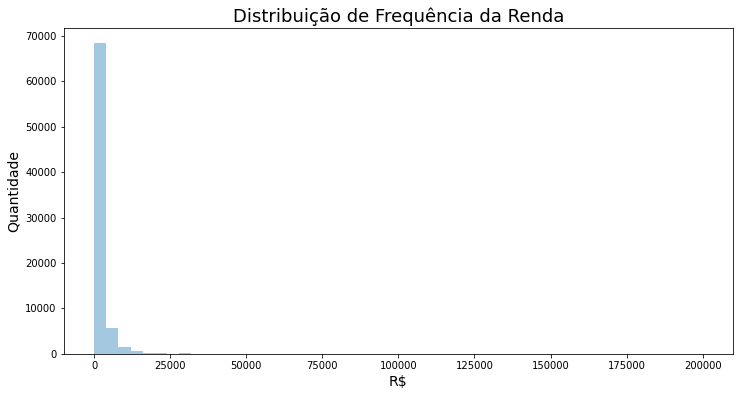

In [12]:
ax = sns.distplot(dataset['Renda'],kde = False)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência da Renda',fontsize=18)
ax.set_ylabel('Quantidade',fontsize = 14)
ax.set_xlabel('R$',fontsize = 14)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Anos')

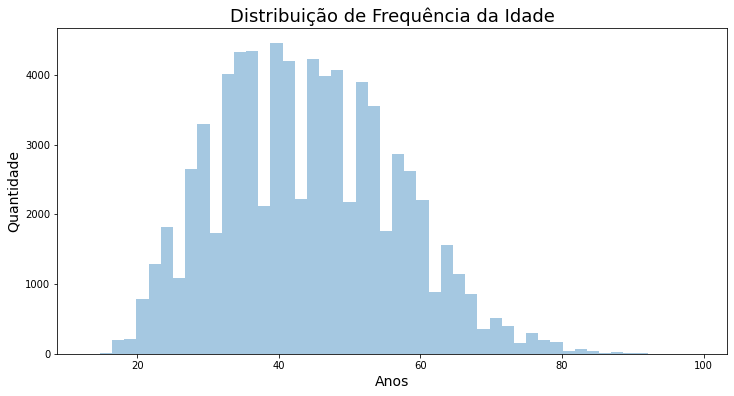

In [13]:
ax = sns.distplot(dataset['Idade'],kde = False)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência da Idade',fontsize=18)
ax.set_ylabel('Quantidade',fontsize = 14)
ax.set_xlabel('Anos',fontsize = 14)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Metros')

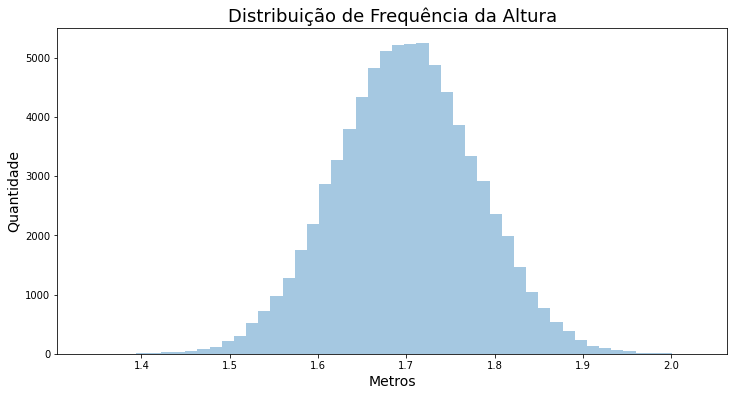

In [15]:
ax = sns.distplot(dataset['Altura'],kde = False)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência da Altura',fontsize=18)
ax.set_ylabel('Quantidade',fontsize = 14)
ax.set_xlabel('Metros',fontsize = 14)

> ### Conclusões

A distribuição de frequência da renda tem uma assimetria fortemente à direita. O que significa que a moda é maior que a mediana que , por sua vez, é maior que a média. Contudo, o gráfico não é tão esclarecedor quanto a assimetria devido a diferença gigantesca de valores da renda, o que certamente tem impacto na média

A distribuição de frequência da idade parece ter uma leve assimetria à direita. Contudo, pode facilmente ser considera simétrica. Portanto será necessário utilizar outras ferramentas estatísticas para confirmar algo mais concreto sobre sua assimetria. Podemos, posteriormente tentar aplicar algum teste de normalidade nesta variável.

A distribuição de frequência da altura é perfeitamente simétrica. E muito provavelmente está distribuição é normal, contudo ainda é necessário aplicar teste de normalidade para confirmar isso.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'R$')

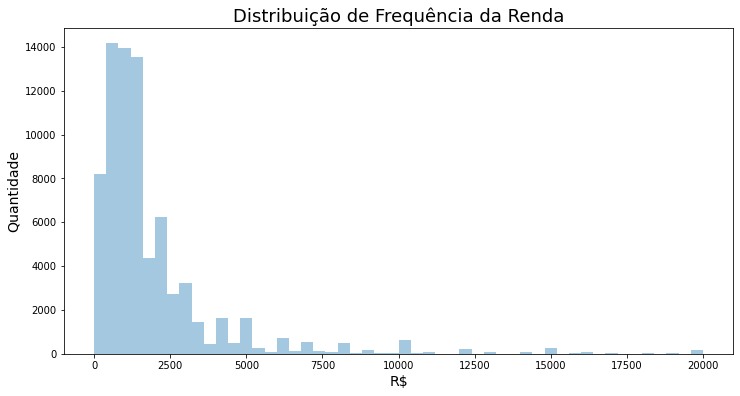

In [16]:
ax = sns.distplot(dataset.query('Renda<= 20000')['Renda'],kde = False)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência da Renda',fontsize=18)
ax.set_ylabel('Quantidade',fontsize = 14)
ax.set_xlabel('R$',fontsize = 14)

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [17]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [18]:
sexo_cor_freq = pd.crosstab(dataset['Sexo'],dataset['Cor'])
sexo_cor_freq.rename(index = sexo,columns=cor,inplace=True)
sexo_cor_freq

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [19]:
sexo_cor_percent = pd.crosstab(dataset['Sexo'],dataset['Cor'],normalize=True)*100
sexo_cor_percent.rename(index = sexo,columns=cor,inplace=True)
sexo_cor_percent

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [20]:
print(sexo_cor_percent['Preta'].sum())
print(sexo_cor_percent['Parda'].sum())
print(sexo_cor_percent.loc['Masculino',['Parda','Branca']].sum())

10.920093701197294
46.7529932326913
61.500520562207186


> ### Conclusões

A maior parte dos chefes de familia (46.75%) se considera parda.

Apenas 11% dos entrevistados se considera preto
 
61% dos chefes de família são homens pardos ou brancos


## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [21]:
dataset.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [22]:
dataset.Renda.median()

1200.0

### Obtenha a moda

In [23]:
dataset.Renda.mode()

0    788
dtype: int64

### Obtenha o desvio médio absoluto

In [24]:
dataset.Renda.mad()

1526.4951371644931

### Obtenha a variância

In [25]:
dataset.Renda.var()

11044906.00622118

### Obtenha o desvio-padrão

In [26]:
dataset.Renda.std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [27]:
renda_sex_cor_posi = pd.crosstab(dataset['Sexo'],dataset['Cor'],aggfunc = {'mean', 'median', 'max'},values=dataset['Renda'])
renda_sex_cor_posi.rename(index = sexo,columns=cor,inplace=True)
renda_sex_cor_posi

max                              ...  median                        
Cor        Indígena    Branca    Preta  Amarela  ...  Branca   Preta Amarela   Parda
Sexo                                             ...                                
Masculino   10000.0  200000.0  50000.0  50000.0  ...  1700.0  1200.0  2800.0  1200.0
Feminino   120000.0  100000.0  23000.0  20000.0  ...  1200.0   800.0  1500.0   800.0

[2 rows x 15 columns]

> ### Conclusões

Claramente a média é afetada pelos valores máximos. Portanto, a média em variáveis como essa pode não representa muito bem o que seria a região central do dados. Nesse caso, a mediana é uma variável mais confiável dado que ela não é afetada pelos valores extremos.

Conseguimos ver isso nitidamente quando comparamos os sexos masculino e feminino da cor indígena perante as três medidas. A mulher indígena que tem a maior renda ganha 12 vezes mais que o homem indígena com a maior renda. A mulher indígena ganha, em média , um pouco mais que 2 vezes o valor do homem indígena. Contudo, a mediana do renda da mulher indígena é um pouco menor do que a mediana da renda do homem indígena. O que significa que a discrepância entre renda das mulheres indígenas é maior do que a dos homens indígenas. Contudo, comprovaremos isso com as medidas de dispersão logo abaixo

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [28]:

renda_sex_cor_disper = pd.crosstab(dataset['Sexo'],dataset['Cor'],aggfunc = {'mad', 'var', 'std'},values=dataset['Renda'])
renda_sex_cor_disper.rename(index = sexo,columns=cor,inplace=True)
renda_sex_cor_disper

mad               ...           var              
Cor           Indígena       Branca  ...       Amarela         Parda
Sexo                                 ...                            
Masculino   798.910889  2261.012346  ...  3.295707e+07  5.345747e+06
Feminino   3007.892952  1670.967106  ...  1.392166e+07  2.547960e+06

[2 rows x 15 columns]

> ### Conclusões

A variância para essa variável não é muito compreensível dado que os valores estão na casa do 10^6 ou mais.

Voltando ao nosso intrigante comparação entre os sexos da cor indígena. Olhando tanto para o desvio médio absoluto quanto para o desvio padrão, podemos confirmar nossa teoria de que há muito mais dispersão da renda das mulheres indígenas do que da renda dos homens indígenas. O desvio médio absoluto da renda das mulheres indígenas é quase 4 vezes maior do que o dos homens indígenas. Já o desvio padrão é quase 10 vezes maior. Contudo, apesar de sabermos dessa diferença na dispersão, ainda temos pouca noção onde se concentra essa dispersão. O boxplot irá nos ajudar nessa empreitada. 

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [140]:
list(cor.values())

['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração']

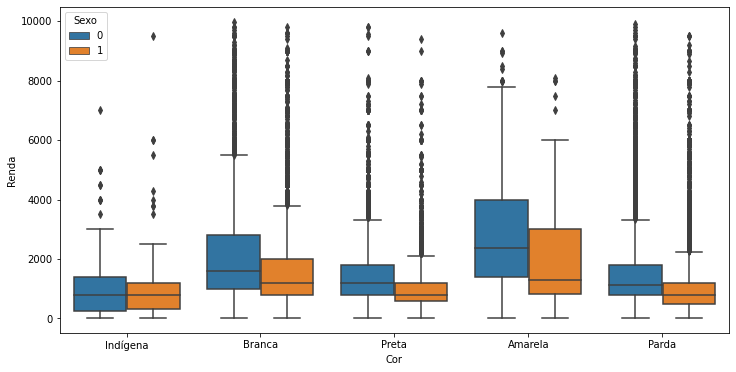

In [143]:
ax = sns.boxplot(data=dataset.query('Renda < 10000'),x='Cor',y='Renda',hue='Sexo',hue_order = sexo)
ax.set_xticklabels(list(cor.values()))
ax.figure.set_size_inches(12,6)

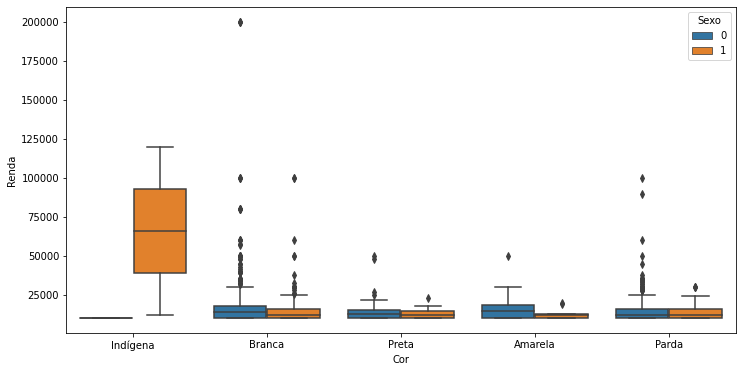

In [144]:
ax = sns.boxplot(data=dataset.query('Renda >= 10000'),x='Cor',y='Renda',hue='Sexo',hue_order = sexo)
ax.set_xticklabels(list(cor.values()))
ax.figure.set_size_inches(12,6)

In [31]:
dataset.query('Renda > 10000 and Cor == 0')

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
43694,33,1,53,0,13,120000,1.661979
54253,35,1,41,0,13,12500,1.686233


> ### Conclusões

O boxplot das pessoas com renda até R$ 10000 nos mostra algumas coisas. As pessoas de cor amarela tem a maior renda, independente do sexo. Homens ganham mais que as mulheres em todas as cores de pele ,com exceção da indígena, onde tem um fato curioso.

Lembra das nossas análises sobre essa cor indígena em relação ao sexo? Chegamos a conclusão que existe uma maior dispersão da renda entre as mulheres indígenas do que entre os homens indígenas. Contudo, isso não é visto no boxplot da renda até R$ 10000. Até esse limite de renda, existe uma maior dispersão da renda dos homens indígenas entre todos os quartis, com exceção do limite inferior ao primeiro quartil, do que há na renda das mulheres indígenas

Portanto, isso me fez endagar sobre o que está acontecendo com as pessoas com renda maior que R$ 10000. Desse modo, também plotei um boxplot para essa faixa de renda. Com esse boxplot, fica evidente que existe uma maior dispersão da renda das mulheres indígenas nessa faixa de renda. Ainda, notei algo estranho. O boxplot estava muito simétrico e sem outlier em uma faixa de renda onde já vimos que tem grandes variações.

Logo fiz uma tabela com os indígenas que ganham extritamente maior que R 10000. Verifiquei que tinha apenas 2 indígenas com essa renda. As 2 eram mulheres, uma ganhava R$ 12500 e a outra ganhava R 120000. 

Ou seja, a mulher indígena que ganha R$ 120000 foi sozinha capaz de aumentar de maneira estratosférica todas as medidas de posição e dispersão da renda das mulheres indígenas. Incrível. Isso mostra que é preciso fazer uma análise bem detalhada dos dados e variáveis para chegarmos em conclusões mais precisas.


# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [122]:
from scipy import stats
print(f"{round(stats.percentileofscore(dataset['Renda'],788,kind='weak'),2)}%")

28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [127]:
print(f"R$ {dataset['Renda'].quantile(0.99)}")

R$ 15000.0


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [89]:
ano_estudo_sexo_renda_est = pd.crosstab(dataset['Sexo'],dataset['Anos de Estudo'],values=dataset['Renda'],aggfunc = ['mean','median','max','std'])
ano_estudo_sexo_renda_est.rename(index=sexo,columns=anos_de_estudo,inplace=True)
ano_estudo_sexo_renda_est

mean  ...              std
Anos de Estudo Sem instrução e menos de 1 ano  ... Não determinados
Sexo                                           ...                 
Masculino                          799.494638  ...       979.648745
Feminino                           516.201748  ...       459.985964

[2 rows x 68 columns]

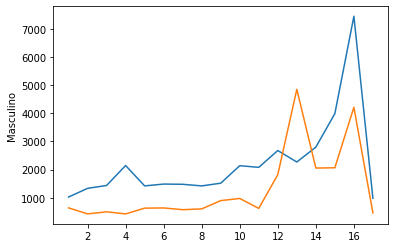

In [86]:
sns.lineplot(x=range(1,18),y = ano_estudo_sexo_renda_est['std'].iloc[0])
sns.lineplot(x=range(1,18),y = ano_estudo_sexo_renda_est['std'].iloc[1])

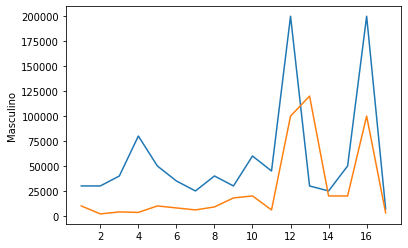

In [87]:
sns.lineplot(x=range(1,18),y = ano_estudo_sexo_renda_est['max'].iloc[0])
sns.lineplot(x=range(1,18),y = ano_estudo_sexo_renda_est['max'].iloc[1])

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

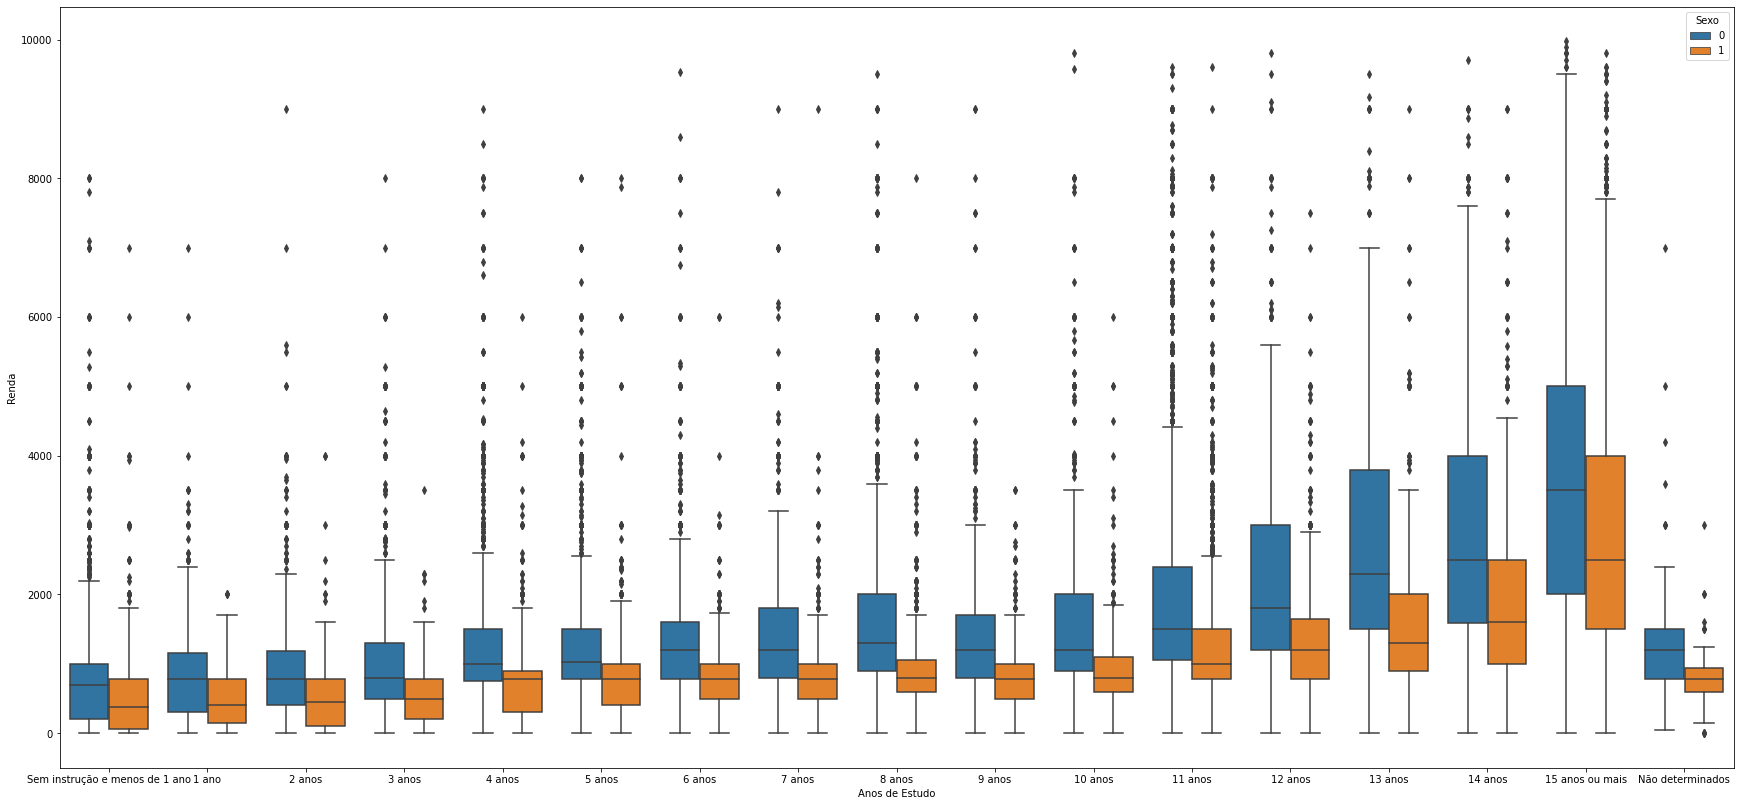

In [150]:
ax = sns.boxplot(data=dataset.query('Renda<10000'),x='Anos de Estudo',y='Renda',hue='Sexo')
ax.set_xticklabels(list(anos_de_estudo.values()))
ax.figure.set_size_inches(30,14)

In [81]:
dataset['Anos de Estudo'].value_counts()

12    20848
16    10795
9      7980
5      6729
1      5849
6      4499
4      2891
8      2689
7      2445
11     2118
3      2101
10     1840
13     1836
15     1388
2      1388
14     1253
17      191
Name: Anos de Estudo, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


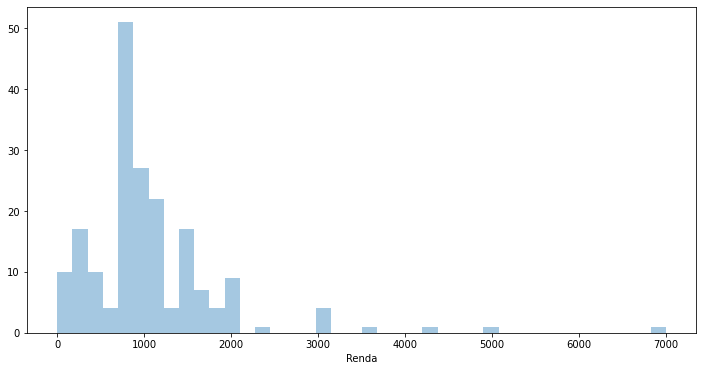

In [79]:
ax = sns.distplot(dataset[dataset['Anos de Estudo'] == 17]['Renda'],kde=False)
ax.figure.set_size_inches(12,6)

> ### Conclusões

Percebe-se que os salários crescem na medida que os anos de estudo aumentam independemente do sexo, apesar que o crescimento da renda dos homens é maior. Podemos verificar esse crescimento tanto pela média, mediana e pelo boxplot. Contudo, acho que o salário máximo não cresce tão bem com o aumento dos anos de estudo. Isso porque o salário máximo é afetado por fatores únicos e muito específicos.

A dispersão da renda também cresce também à medida que cresce os anos de estudo, sendo o homem tendo um aumento maior e mais sustentável dessa dispersão. Verificamos isso através do desvio padrão

Lembrando que o número de 17 não significa 16 anos, mas, na verdade, significa sem determinação.


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [97]:
uf_renda_stats = dataset.groupby('UF').agg({'Renda':['mean','median','max','std']})
uf_renda_stats.rename(index=uf,inplace=True)
uf_renda_stats

Renda                             
                            mean  median     max          std
UF                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

In [106]:
uf

{11: 'Rondônia',
 12: 'Acre',
 13: 'Amazonas',
 14: 'Roraima',
 15: 'Pará',
 16: 'Amapá',
 17: 'Tocantins',
 21: 'Maranhão',
 22: 'Piauí',
 23: 'Ceará',
 24: 'Rio Grande do Norte',
 25: 'Paraíba',
 26: 'Pernambuco',
 27: 'Alagoas',
 28: 'Sergipe',
 29: 'Bahia',
 31: 'Minas Gerais',
 32: 'Espírito Santo',
 33: 'Rio de Janeiro',
 35: 'São Paulo',
 41: 'Paraná',
 42: 'Santa Catarina',
 43: 'Rio Grande do Sul',
 50: 'Mato Grosso do Sul',
 51: 'Mato Grosso',
 52: 'Goiás',
 53: 'Distrito Federal'}

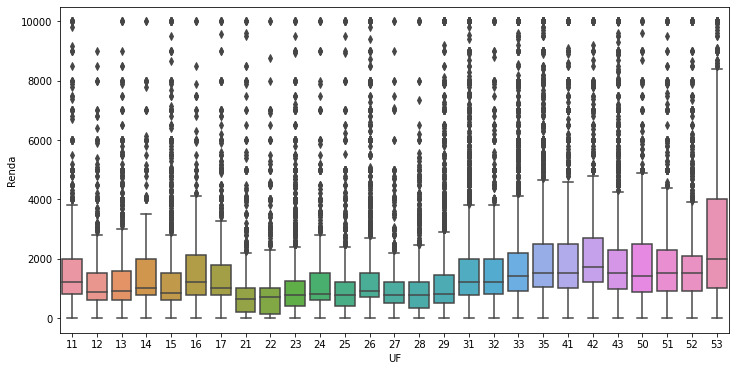

In [120]:
ax = sns.boxplot(data=dataset.query('Renda <= 10000'),x='UF',y='Renda')
ax.figure.set_size_inches(12,6)

> ### Conclusões

A renda das pessoas que vivem na região Norte aparenta ser maior das que vivem na região Nordeste, podemos verficar isso tanto pela mediana quando pelo boxplot. O que é algo um pouco supreendente para mim.

As regiões Centro-Oeste, Sudeste e Sul apresenta pessoas com rendas maiores do que as regiões Norte e Nordeste. A dispersão dos rendas também é maior nessas três regiões supracitadas, podemos ver isso tanto pelo boxplot quanto pelo desvio padrão.

Destaque especial para Distrito Federal.Em que sua população tem renda com mediana, terceiro quartil e limite superior bem superiores a da renda dos outros estados.Assim como maior desvio padrão. O que mostra que sua população tem renda bem maior que a dos outros estados e com uma discrepância interna bem maior também. Bem, os políticos vivem lá...